# Importing packages

In [1]:
# Reading and saving data
import pandas as pd 

# Computations
import numpy as np 

# Ploting 
import matplotlib.pyplot as plt
import pydot

# Deep learning
import tensorflow as tf 

# Keras API 
from tensorflow import keras

# Deep learning 
from keras.models import Input, Model
from keras.layers import Concatenate, Dense, Masking
from keras import losses

# Reading the data 

The data is split into two parts in a single file: dataset1 and dataset2.
    
Which data is which can be identified from the column **DatasetID**.

In [2]:
d = pd.read_csv('data/multitasklearnig_task.csv')

In [3]:
print(f'Shape of the dataset: {d.shape}')

Shape of the dataset: (1000030, 10)


In [4]:
print(d.head())

   DatasetID    x1    x2    x3    x4    x5    x6     z   y1  y2
0          1 -1.84 -4.66  2.13 -1.32 -5.86 -4.69  2.89  0.0 NaN
1          1  1.31  0.16  2.94 -0.88  0.15 -3.69  1.25  1.0 NaN
2          1  0.60  4.23 -0.10  0.52  3.04 -0.23 -3.00  1.0 NaN
3          1  1.94  1.68  0.15 -3.16  0.12 -3.80  8.14  1.0 NaN
4          1  2.95  0.25  0.24 -0.47  3.10  0.69 -0.53  0.0 NaN


In [5]:
print(d.tail())

         DatasetID    x1    x2    x3    x4    x5    x6   z  y1         y2
1000025          2 -3.28 -1.20  0.50 -0.43 -2.13 -1.62 NaN NaN -19.905467
1000026          2  2.41  5.34 -3.96 -0.62  3.90 -4.47 NaN NaN   3.440164
1000027          2  2.74  5.80 -4.03 -0.82  6.98  4.53 NaN NaN  17.879392
1000028          2 -0.79 -4.31  3.73  0.83  0.23 -1.59 NaN NaN   0.764875
1000029          2  5.15  2.43 -1.69  1.46  3.36 -0.63 NaN NaN  19.181821


The number of observations for each dataset:

In [6]:
print(d.groupby('DatasetID').size())

DatasetID
1         30
2    1000000
dtype: int64


The first data set contains 30 rows while the second one contains 1 million rows.

# Spliting the dataset into two subsets

The first data set target variable is binary - 1 or 0. Thus the objective here is to model a probability given the $X$ matrix: 

$$ p(Y | X, Z) $$

The second one's target variable is continues so the problem is a regression problem: 

$$ E[Y | X] $$

In [65]:
# Subseting
d1 = d[d['DatasetID']==1]
d2 = d[d['DatasetID']==2]

# Reseting the indexes
d1.reset_index(inplace=True, drop=True)
d2.reset_index(inplace=True, drop=True)

In [66]:
d2 = d2.head(10000)

Creating the matrices $X_{1}$, $Y_{1}$ for the logistic problem and $X_{2}$, $Y_{2}$ for the regression problem:

In [67]:
# List of features
features_x = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
features_z = ['z']

# 'Probabalistic' dataset
X1, Z1, Y1 = d1[features_x], d1[features_z], d1['y1']

# 'Continues' dataset
X2, Y2 = d2[features_x], d2['y2']

# Analyzing the subsets separately

## Regression problem 

The goal of the neural network is to try and infer the coefficients in the regression:
    
$$ E[Y_{2}|X] = \beta X = \beta_{0} + \beta_{1}x_{1} + \beta_{2} x_{2} + ... + \beta_{6} x_{6}$$

Using the neural network we will find the vector

$$ 
\widehat{\beta} = \begin{bmatrix}  
\beta_{0} \\
\beta_{1} \\
\beta_{3} \\
... \\
\beta_{6}
\end{bmatrix}
$$

In [68]:
# Input shape
inputRegression = Input(shape=(X2.shape[1], ))

# One neuron in the hidden layer with the linear activation function for regression
neuron = Dense(1, activation='linear')(inputRegression)

# Defining the model
model = Model(inputRegression, neuron)

In [69]:
model.summary()

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 6)]               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


There are 7 parameters that will be trained in this model. The first six correspond to each of the features and the last one is the bias term or the intercept $\beta_{0}$.

In [70]:
# Compiling the model
model.compile(loss=losses.MeanSquaredError(), optimizer='sgd')

# Fitting the model
history = model.fit(X2, Y2, epochs = 100, batch_size=1024)

Epoch 1/100
10/10 [==============================] - 0s 473us/step - loss: 191.6873
Epoch 2/100
10/10 [==============================] - 0s 452us/step - loss: 101.5408
Epoch 3/100
10/10 [==============================] - 0s 493us/step - loss: 100.6513
Epoch 4/100
10/10 [==============================] - 0s 697us/step - loss: 100.4567
Epoch 5/100
10/10 [==============================] - 0s 911us/step - loss: 100.4773
Epoch 6/100
10/10 [==============================] - 0s 560us/step - loss: 100.4819
Epoch 7/100
10/10 [==============================] - 0s 763us/step - loss: 100.4010
Epoch 8/100
10/10 [==============================] - 0s 767us/step - loss: 100.4245
Epoch 9/100
10/10 [==============================] - 0s 502us/step - loss: 100.4705
Epoch 10/100
10/10 [==============================] - 0s 591us/step - loss: 100.4272
Epoch 11/100
10/10 [==============================] - 0s 490us/step - loss: 100.4428
Epoch 12/100
10/10 [==============================] - 0s 516us/step - loss

10/10 [==============================] - 0s 844us/step - loss: 100.4337
Epoch 98/100
10/10 [==============================] - 0s 697us/step - loss: 100.4225
Epoch 99/100
10/10 [==============================] - 0s 546us/step - loss: 100.4465
Epoch 100/100
10/10 [==============================] - 0s 510us/step - loss: 100.4291


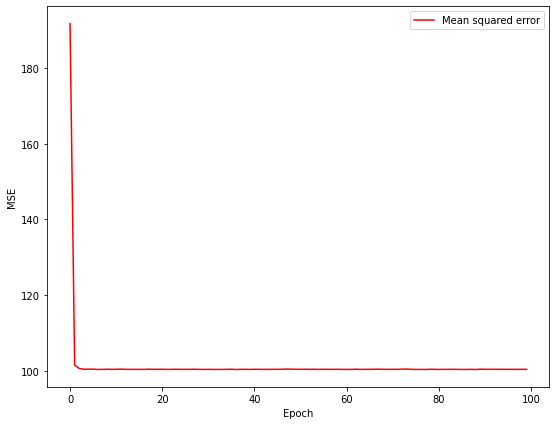

In [71]:
mse = history.history['loss']

epochs = range(len(mse))

plt.figure(figsize=(9, 7))
plt.plot(epochs, mse, 'r', label='Mean squared error')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [32]:
# Extracting the weights
beta = model.weights

In [33]:
# Coefficients near the regressors
beta[0].numpy().tolist()

[[2.0353264808654785],
 [2.019451379776001],
 [2.065535068511963],
 [1.9610321521759033],
 [1.0172067880630493],
 [1.9323822259902954]]

In [34]:
# Bias term
beta[1].numpy().tolist()

[-0.0667329654097557]

According to the neural network the expected value $Y$ given $X$ is:
    
$$ E[Y | X] = 0 + 0.021 x_{1} + 0.609 x_{2} - 0.697 x_{3} - 0.392 x_{4} - 0.512 x_{5} - 0.333 x_{6}$$

## Logistic regression problem

The goal of fitting the neural network is to find the coefficients $\alpha$ and $\gamma$ in:

$$ p(Y | X, Z) = \dfrac{1}{1 - e^{-(\alpha X + \gamma Z})} $$

In [52]:
# Input shape
inputLogisticRegression1 = Input(shape=(X1.shape[1], ))
inputLogisticRegression2 = Input(shape=(Z1.shape[1], ))

# One neuron in the hidden layer with the linear activation function
neuron = Dense(1, activation='linear')(inputLogisticRegression1)

# Additional information from z 
x = Concatenate(axis=1)([neuron, inputLogisticRegression2])

# Last logistic neuron 
logistic = Dense(1, activation='sigmoid')(x)

# Defining the model, 
model = Model([inputLogisticRegression1, inputLogisticRegression2], logistic)

In [53]:
model.summary()

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 1)            7           input_15[0][0]                   
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
concatenate_5 (Concatenate)     (None, 2)            0           dense_14[0][0]                   
                                                                 input_16[0][0]       

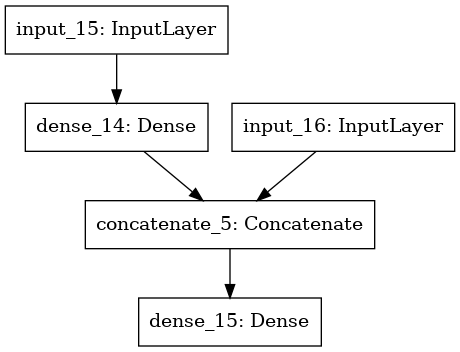

In [54]:
tf.keras.utils.plot_model(model)

In [58]:
# Compiling the model
model.compile(loss=losses.BinaryCrossentropy(), optimizer='sgd')

# Fitting the model
history = model.fit([X1, Z1], Y1, epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 0s 685us/step - loss: 0.2860
Epoch 2/1000
1/1 [==============================] - 0s 445us/step - loss: 0.2856
Epoch 3/1000
1/1 [==============================] - 0s 496us/step - loss: 0.2852
Epoch 4/1000
1/1 [==============================] - 0s 423us/step - loss: 0.2848
Epoch 5/1000
1/1 [==============================] - 0s 517us/step - loss: 0.2845
Epoch 6/1000
1/1 [==============================] - 0s 464us/step - loss: 0.2841
Epoch 7/1000
1/1 [==============================] - 0s 757us/step - loss: 0.2837
Epoch 8/1000
1/1 [==============================] - 0s 797us/step - loss: 0.2833
Epoch 9/1000
1/1 [==============================] - 0s 734us/step - loss: 0.2829
Epoch 10/1000
1/1 [==============================] - 0s 548us/step - loss: 0.2825
Epoch 11/1000
1/1 [==============================] - 0s 517us/step - loss: 0.2822
Epoch 12/1000
1/1 [==============================] - 0s 681us/step - loss: 0.2818
Epoch 13/1000
1/1 [======

1/1 [==============================] - 0s 597us/step - loss: 0.2547
Epoch 102/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2545
Epoch 103/1000
1/1 [==============================] - 0s 643us/step - loss: 0.2542
Epoch 104/1000
1/1 [==============================] - 0s 538us/step - loss: 0.2540
Epoch 105/1000
1/1 [==============================] - 0s 867us/step - loss: 0.2538
Epoch 106/1000
1/1 [==============================] - 0s 851us/step - loss: 0.2535
Epoch 107/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2533
Epoch 108/1000
1/1 [==============================] - 0s 757us/step - loss: 0.2530
Epoch 109/1000
1/1 [==============================] - 0s 640us/step - loss: 0.2528
Epoch 110/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2525
Epoch 111/1000
1/1 [==============================] - 0s 872us/step - loss: 0.2523
Epoch 112/1000
1/1 [==============================] - 0s 617us/step - loss: 0.2521
Epoch 113/1000
1/1 [=====

1/1 [==============================] - 0s 658us/step - loss: 0.2337
Epoch 200/1000
1/1 [==============================] - 0s 627us/step - loss: 0.2336
Epoch 201/1000
1/1 [==============================] - 0s 780us/step - loss: 0.2334
Epoch 202/1000
1/1 [==============================] - 0s 698us/step - loss: 0.2332
Epoch 203/1000
1/1 [==============================] - 0s 916us/step - loss: 0.2330
Epoch 204/1000
1/1 [==============================] - 0s 851us/step - loss: 0.2328
Epoch 205/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2326
Epoch 206/1000
1/1 [==============================] - 0s 755us/step - loss: 0.2324
Epoch 207/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2323
Epoch 208/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2321
Epoch 209/1000
1/1 [==============================] - 0s 787us/step - loss: 0.2319
Epoch 210/1000
1/1 [==============================] - 0s 812us/step - loss: 0.2317
Epoch 211/1000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 0.2169
Epoch 299/1000
1/1 [==============================] - 0s 915us/step - loss: 0.2167
Epoch 300/1000
1/1 [==============================] - 0s 704us/step - loss: 0.2166
Epoch 301/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2164
Epoch 302/1000
1/1 [==============================] - 0s 821us/step - loss: 0.2162
Epoch 303/1000
1/1 [==============================] - 0s 621us/step - loss: 0.2161
Epoch 304/1000
1/1 [==============================] - 0s 701us/step - loss: 0.2159
Epoch 305/1000
1/1 [==============================] - 0s 973us/step - loss: 0.2158
Epoch 306/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2156
Epoch 307/1000
1/1 [==============================] - 0s 721us/step - loss: 0.2155
Epoch 308/1000
1/1 [==============================] - 0s 600us/step - loss: 0.2153
Epoch 309/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2152
Epoch 310/1000
1/1 [=======

1/1 [==============================] - 0s 1ms/step - loss: 0.2022
Epoch 398/1000
1/1 [==============================] - 0s 696us/step - loss: 0.2021
Epoch 399/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2020
Epoch 400/1000
1/1 [==============================] - 0s 618us/step - loss: 0.2018
Epoch 401/1000
1/1 [==============================] - 0s 550us/step - loss: 0.2017
Epoch 402/1000
1/1 [==============================] - 0s 587us/step - loss: 0.2016
Epoch 403/1000
1/1 [==============================] - 0s 684us/step - loss: 0.2014
Epoch 404/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2013
Epoch 405/1000
1/1 [==============================] - 0s 713us/step - loss: 0.2011
Epoch 406/1000
1/1 [==============================] - 0s 783us/step - loss: 0.2010
Epoch 407/1000
1/1 [==============================] - 0s 619us/step - loss: 0.2009
Epoch 408/1000
1/1 [==============================] - 0s 754us/step - loss: 0.2007
Epoch 409/1000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 0.1890
Epoch 497/1000
1/1 [==============================] - 0s 942us/step - loss: 0.1889
Epoch 498/1000
1/1 [==============================] - 0s 841us/step - loss: 0.1887
Epoch 499/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1886
Epoch 500/1000
1/1 [==============================] - 0s 808us/step - loss: 0.1885
Epoch 501/1000
1/1 [==============================] - 0s 664us/step - loss: 0.1883
Epoch 502/1000
1/1 [==============================] - 0s 773us/step - loss: 0.1882
Epoch 503/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1881
Epoch 504/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1880
Epoch 505/1000
1/1 [==============================] - 0s 906us/step - loss: 0.1878
Epoch 506/1000
1/1 [==============================] - 0s 982us/step - loss: 0.1877
Epoch 507/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1876
Epoch 508/1000
1/1 [=========

1/1 [==============================] - 0s 773us/step - loss: 0.1767
Epoch 596/1000
1/1 [==============================] - 0s 551us/step - loss: 0.1766
Epoch 597/1000
1/1 [==============================] - 0s 701us/step - loss: 0.1764
Epoch 598/1000
1/1 [==============================] - 0s 707us/step - loss: 0.1763
Epoch 599/1000
1/1 [==============================] - 0s 839us/step - loss: 0.1762
Epoch 600/1000
1/1 [==============================] - 0s 581us/step - loss: 0.1761
Epoch 601/1000
1/1 [==============================] - 0s 766us/step - loss: 0.1760
Epoch 602/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1758
Epoch 603/1000
1/1 [==============================] - 0s 880us/step - loss: 0.1757
Epoch 604/1000
1/1 [==============================] - 0s 824us/step - loss: 0.1756
Epoch 605/1000
1/1 [==============================] - 0s 738us/step - loss: 0.1755
Epoch 606/1000
1/1 [==============================] - 0s 648us/step - loss: 0.1754
Epoch 607/1000
1/1 [=

1/1 [==============================] - 0s 688us/step - loss: 0.1651
Epoch 695/1000
1/1 [==============================] - 0s 598us/step - loss: 0.1650
Epoch 696/1000
1/1 [==============================] - 0s 855us/step - loss: 0.1649
Epoch 697/1000
1/1 [==============================] - 0s 898us/step - loss: 0.1648
Epoch 698/1000
1/1 [==============================] - 0s 894us/step - loss: 0.1646
Epoch 699/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1645
Epoch 700/1000
1/1 [==============================] - 0s 600us/step - loss: 0.1644
Epoch 701/1000
1/1 [==============================] - 0s 536us/step - loss: 0.1643
Epoch 702/1000
1/1 [==============================] - 0s 835us/step - loss: 0.1642
Epoch 703/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1641
Epoch 704/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1640
Epoch 705/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1639
Epoch 706/1000
1/1 [=======

1/1 [==============================] - 0s 671us/step - loss: 0.1542
Epoch 794/1000
1/1 [==============================] - 0s 696us/step - loss: 0.1541
Epoch 795/1000
1/1 [==============================] - 0s 912us/step - loss: 0.1539
Epoch 796/1000
1/1 [==============================] - 0s 576us/step - loss: 0.1538
Epoch 797/1000
1/1 [==============================] - 0s 588us/step - loss: 0.1537
Epoch 798/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1536
Epoch 799/1000
1/1 [==============================] - 0s 681us/step - loss: 0.1535
Epoch 800/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1534
Epoch 801/1000
1/1 [==============================] - 0s 791us/step - loss: 0.1533
Epoch 802/1000
1/1 [==============================] - 0s 627us/step - loss: 0.1532
Epoch 803/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1531
Epoch 804/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1530
Epoch 805/1000
1/1 [=======

1/1 [==============================] - 0s 658us/step - loss: 0.1438
Epoch 893/1000
1/1 [==============================] - 0s 562us/step - loss: 0.1437
Epoch 894/1000
1/1 [==============================] - 0s 920us/step - loss: 0.1436
Epoch 895/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1435
Epoch 896/1000
1/1 [==============================] - 0s 601us/step - loss: 0.1434
Epoch 897/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1433
Epoch 898/1000
1/1 [==============================] - 0s 735us/step - loss: 0.1432
Epoch 899/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1431
Epoch 900/1000
1/1 [==============================] - 0s 915us/step - loss: 0.1430
Epoch 901/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1429
Epoch 902/1000
1/1 [==============================] - 0s 658us/step - loss: 0.1428
Epoch 903/1000
1/1 [==============================] - 0s 989us/step - loss: 0.1427
Epoch 904/1000
1/1 [=======

1/1 [==============================] - 0s 853us/step - loss: 0.1340
Epoch 992/1000
1/1 [==============================] - 0s 758us/step - loss: 0.1339
Epoch 993/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1338
Epoch 994/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1337
Epoch 995/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1336
Epoch 996/1000
1/1 [==============================] - 0s 782us/step - loss: 0.1335
Epoch 997/1000
1/1 [==============================] - 0s 603us/step - loss: 0.1334
Epoch 998/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1333
Epoch 999/1000
1/1 [==============================] - 0s 808us/step - loss: 0.1332
Epoch 1000/1000
1/1 [==============================] - 0s 721us/step - loss: 0.1331


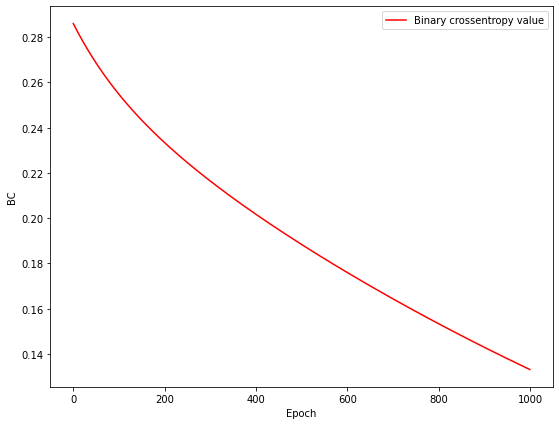

In [60]:
loss = history.history['loss']

epochs = range(len(loss))

plt.figure(figsize=(9, 7))
plt.plot(epochs, loss, 'r', label='Binary crossentropy value')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('BC')
plt.show()

In [61]:
# Extracting the coefficients
alpha = model.weights

In [62]:
alpha

[<tf.Variable 'dense_14/kernel:0' shape=(6, 1) dtype=float32, numpy=
 array([[0.2982653 ],
        [0.6109626 ],
        [1.1739295 ],
        [0.5503258 ],
        [0.4011326 ],
        [0.10370781]], dtype=float32)>,
 <tf.Variable 'dense_14/bias:0' shape=(1,) dtype=float32, numpy=array([-0.2878695], dtype=float32)>,
 <tf.Variable 'dense_15/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[1.0473993 ],
        [0.37149298]], dtype=float32)>,
 <tf.Variable 'dense_15/bias:0' shape=(1,) dtype=float32, numpy=array([-0.48887843], dtype=float32)>]

# Assumptions

Both the datasets have dependencies from one another in their data generating process.  

$$ p(Y_{1}| X, Z) = \dfrac{1}{1 - e^{-(\beta_{1}X_{1} + \beta_{2}Z})} \in (0, 1) $$ 

$$ E[Y_{2}|X] = \beta_{3} X $$

$$ \beta_{1} = \alpha \beta_{3} $$ 

# Shapes of training matrices

In [63]:
print(f"Shape of matrix for logistic regression: {X1.shape}")

Shape of matrix for logistic regression: (30, 6)


In [64]:
print(f"Shape of matrix for linear regression: {X2.shape}")

Shape of matrix for linear regression: (1000000, 6)


# Preparing the input matrices

In [112]:
Xnn = pd.concat([X1, X2], axis=0)

,x1,x2,x3,x4,x5,x6,x1,x2,x3,x4,x5,x6
0,-1.84,-4.66,2.13,-1.32,-5.86,-4.69,-1.15,-1.31,-3.15,-1.64,-1.02,-1.26
1,1.31,0.16,2.94,-0.88,0.15,-3.69,2.81,-0.46,2.79,0.36,-0.94,6.30
2,0.60,4.23,-0.10,0.52,3.04,-0.23,-1.31,-0.39,2.66,0.47,-0.42,0.06
3,1.94,1.68,0.15,-3.16,0.12,-3.80,1.91,7.56,0.18,1.60,2.60,-6.90
4,2.95,0.25,0.24,-0.47,3.10,0.69,-1.80,2.18,-2.61,-4.25,-2.13,2.92
...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,-4.39,1.04,-0.78,0.36,-2.31,-3.40
96,NaN,NaN,NaN,NaN,NaN,NaN,1.43,5.58,0.91,-0.22,2.23,-2.55
97,NaN,NaN,NaN,NaN,NaN,NaN,-1.17,0.16,-0.32,-0.61,-0.87,1.44
98,NaN,NaN,NaN,NaN,NaN,NaN,-4.03,1.16,-6.42,0.11,0.63,3.57


In [113]:
X = pd.concat([X1, X2], axis=1)

# Spliting the two matrices
X1nn = X.iloc[:, :(len(features) - 1)]
X2nn = X.iloc[:, (len(features) - 1):]

# Model architecture

In [114]:
from keras.models import Input, Model
from keras.layers import Concatenate, Dense, Masking

In [126]:
# Input layer dimensions
# X matrix for the probabalistic objective
inputA = Input(shape=(X1.shape[1], X1.shape[0]))
inputB = Input(shape=(X2.shape[1], X2.shape[0]))

# First layer of the network
dense1 = Dense(1, activation='linear')(inputA)

# The model 
model = Model([inputA, inputB], dense1)

In [127]:
model.summary()

Model: "functional_37"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_71 (InputLayer)           [(None, 6, 30)]      0                                            
__________________________________________________________________________________________________
input_72 (InputLayer)           [(None, 6, 100)]     0                                            
__________________________________________________________________________________________________
dense_33 (Dense)                (None, 6, 1)         31          input_71[0][0]                   
Total params: 31
Trainable params: 31
Non-trainable params: 0
__________________________________________________________________________________________________


In [128]:
model.predict([X1, X2])

ValueError: Data cardinality is ambiguous:
  x sizes: 30, 100
Please provide data which shares the same first dimension.